In [1]:
# Importing packages
import numpy as np
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import folium
from folium.plugins import HeatMap
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('kc_house_data.csv')

In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

The columns are:
- id: a notation for a house
- date: Date house was sold
- price: Price is prediction target
- bedrooms: Number of Bedrooms/House
- bathrooms: Number of bathrooms/House
- sqft_living: square footage of the home
- sqft_lot: square footage of the lot
- floors: Total floors (levels) in house
- waterfront: House which has a view to a waterfront
- view: Has been viewed
- condition: How good the condition is ( Overall )
- grade: Overall grade given to the housing unit, based on King County grading system
- sqft_above: square footage of house apart from basement
- sqft_basement: square footage of the basement
- yr_built: Built Year
- yr_renovated: Year when house was renovated
- zipcode: zip
- lat: Latitude coordinate
- long: Longitude coordinate
- sqft_living15: Living room area in 2015 (implies some renovations) This might or might not have affected the lotsize area
- sqft_lot15: lotSize area in 2015(implies some renovations)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
# counting null values
df.isnull().sum().sort_values(ascending = False)

sqft_lot15       0
view             0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
sqft_living15    0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
id               0
dtype: int64

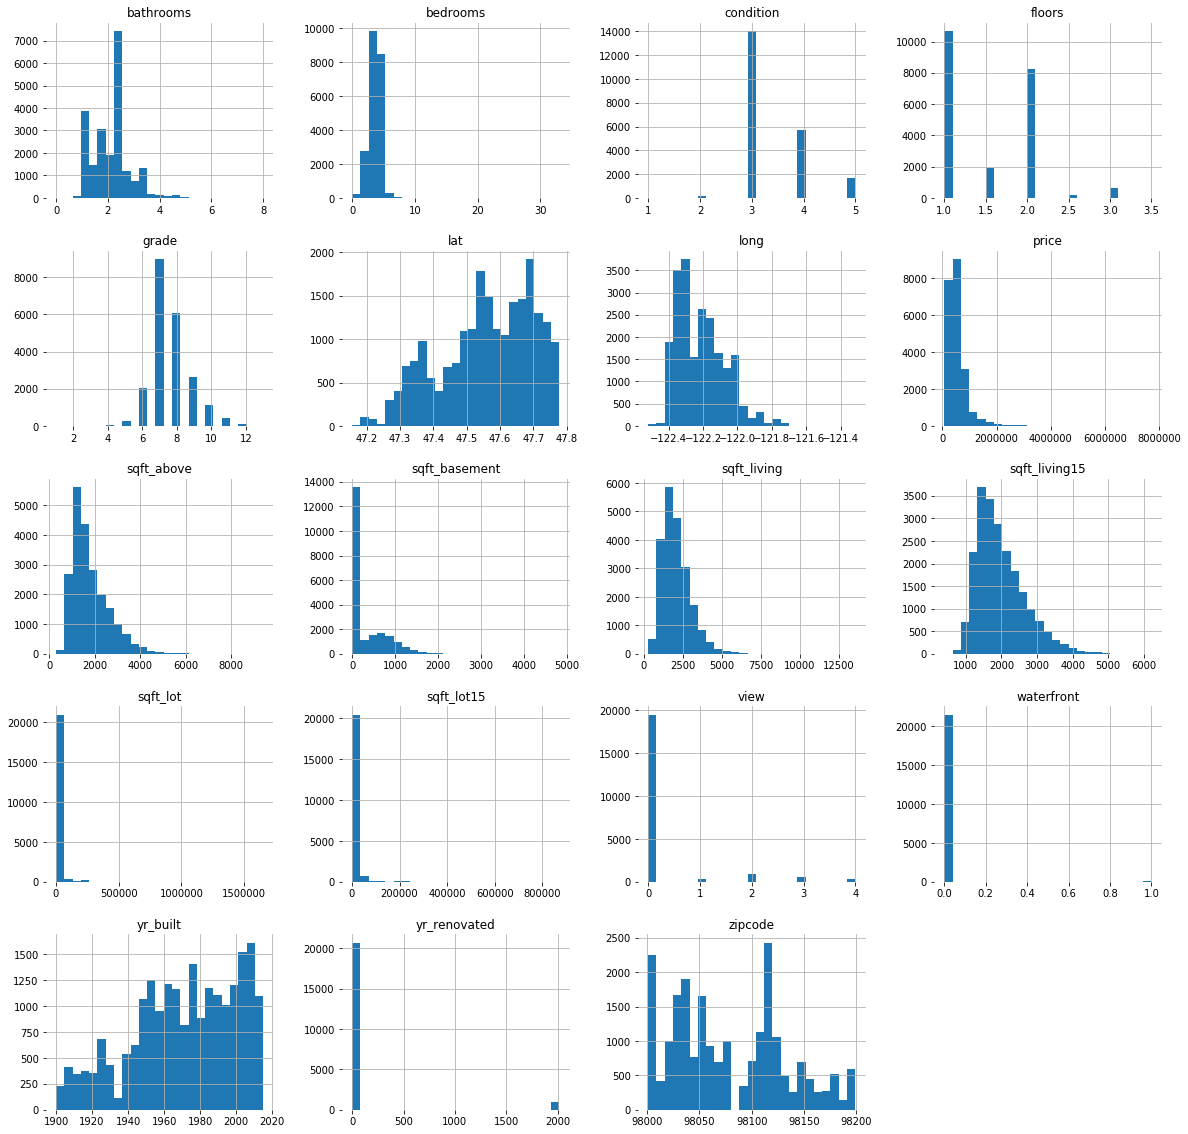

In [9]:
df1 = df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
    'lat', 'long', 'sqft_living15', 'sqft_lot15']]
h = df1.hist(bins = 25, figsize = (20,20), xlabelsize = '10', ylabelsize = '10')
sns.despine(left = True, bottom = True)

To look at the relationship between price and variables such as floors and number of bedrooms, boxplots will be useful. However it is important to remember that these are actually numeric variables, and not categoric.

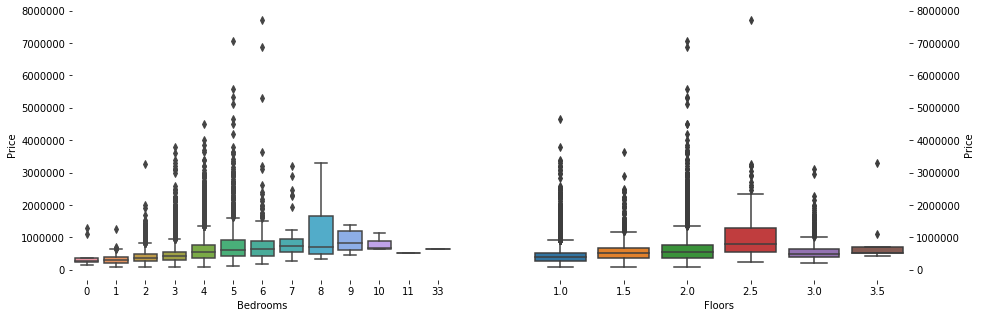

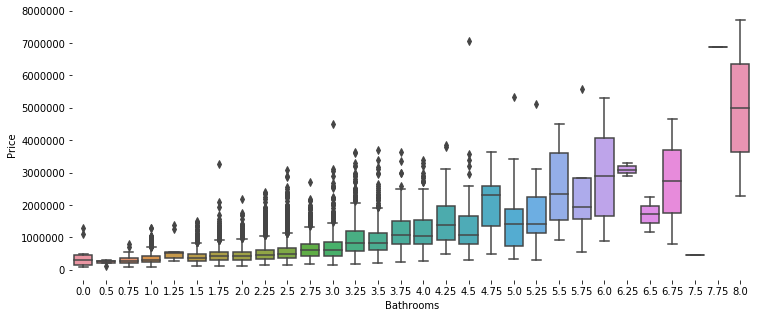

In [10]:
f, axes = plt.subplots(1, 2,figsize = (15,5))
sns.boxplot(x = df['bedrooms'],y = df['price'], ax = axes[0])
sns.boxplot(x = df['floors'],y = df['price'], ax = axes[1])
sns.despine(left = True, bottom = True)
axes[0].set(xlabel = 'Bedrooms', ylabel = 'Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel = 'Floors', ylabel = 'Price')

f, axes2 = plt.subplots(1, 1,figsize=(12.18,5))
sns.despine(left = True, bottom = True)
sns.boxplot(x=df['bathrooms'],y = df['price'], ax = axes2)
axes2.yaxis.tick_left()
axes2.set(xlabel = 'Bathrooms', ylabel='Price');

We can see that clearly there are some outliers like a 33-bedroom house, a nearly $8 million house etc. However, determining their possible effect will be not be straightforward. For this example, let us not remove outliers. Again this is not an exact science, and a number of factors come into play when deciding on how to deal with outliers.

Let's look at the relationship between price and a few other categoric variables

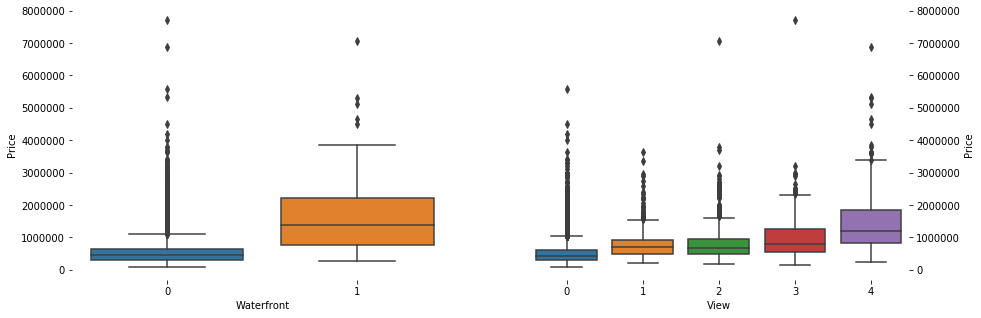

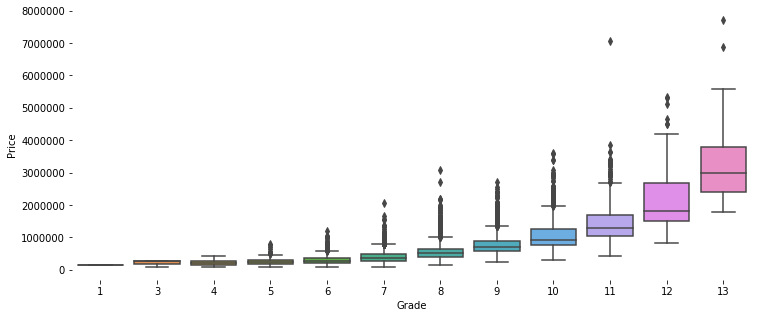

In [11]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x = df['waterfront'],y = df['price'], ax = axes[0])
sns.boxplot(x = df['view'],y = df['price'], ax=axes[1])
sns.despine(left = True, bottom = True)
axes[0].set(xlabel='Waterfront', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='View', ylabel='Price')

f, axe = plt.subplots(1, 1,figsize=(12.18,5))
sns.boxplot(x=df['grade'],y=df['price'], ax=axe)
sns.despine(left=True, bottom=True)
axe.yaxis.tick_left()
axe.set(xlabel='Grade', ylabel='Price');

### Checking for correlation amongst explanatory variables

A model with too many features can lead to overfitting. When there is high correlation between features, it is a good idea to not use both so as to reduce the rosk of overfitting. Another alternative if correlation is moderate is to "partial out" one variable - regress one against the other and take the residuals of the regression instead of the original.

Removing correlated variables is a bit of an art. Sometimes business logic or domain knowledge might suggest retaining variables that we might want to remove. 

One way of checking for problematic correlations is by simply examining the correlations between pairs of variables. Equally, after building the model, it is advisable to check for multicollinearity and remove problematic variables.

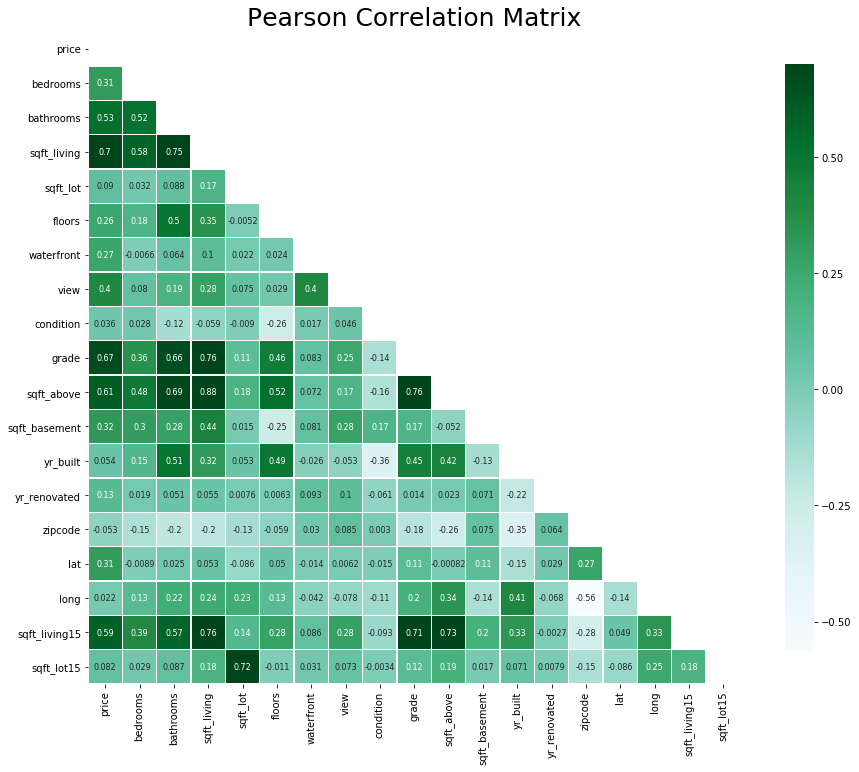

In [12]:
features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

mask = np.zeros_like(df[features].corr(), dtype = np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr(),linewidths = 0.25,vmax = 0.7,square = True,cmap = "BuGn", 
            linecolor = 'w',annot = True,annot_kws = {"size":8},mask = mask,cbar_kws = {"shrink": 0.9})


### Evaluation

In [13]:
# Defining a dataframe for collecting all model performance on 
# different metrics to get a complete overview
evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})

In [14]:
# Creating empty data frame
evaluation

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
## Doing a test train split
train_data,test_data = train_test_split(df,train_size = 0.8,random_state = 123)
# random state number doesn't matter.

In [18]:
X_train = np.array(train_data['sqft_living'], dtype = pd.Series).reshape(-1,1)
y_train = np.array(train_data['price'], dtype = pd.Series)

In [19]:
from sklearn import linear_model

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
## Applying simple linear regression model
lr = LinearRegression()

In [22]:
## fitting the train dataset
lr.fit(X_train, y_train)
#lr.fit =>building a model
#X is usally matrix,y is vector


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
X_test = np.array(test_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_test = np.array(test_data['price'], dtype = pd.Series)

In [24]:
# predicting the test dataset
pred = lr.predict(X_test)

In [25]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [26]:
# evaluating the model performance
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrsm = float(format(lr.score(X_train, y_train),'.3f'))
rtesm = float(format(lr.score(X_test, y_test),'.3f'))
cv = float(format(cross_val_score(lr,df[['sqft_living']],df['price'],cv=5).mean(),'.3f'))

print ("Average Price for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))

Average Price for Test Data: 543214.476
Intercept: -39192.41154962918
Coefficient: [278.22211657]


In [27]:
## Adding the evaluation results in evaluation dataframe
r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression','-',rmsesm,rtrsm,'-',rtesm,'-',cv]
evaluation

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,-,261457.878,0.487,-,0.516,-,0.491


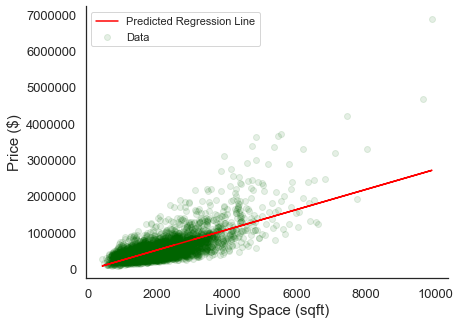

In [28]:
## Let us see our results visually
sns.set(style = "white", font_scale = 1)
plt.figure(figsize = (6.5,5))
plt.scatter(X_test, y_test, color = 'darkgreen', label = "Data", alpha = 0.1)
plt.plot(X_test, lr.predict(X_test),color = "red", label = "Predicted Regression Line")
plt.xlabel("Living Space (sqft)", fontsize = 15)
plt.ylabel("Price ($)", fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend()

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [29]:
#Another feature


We used a simple linear regression and found a poor fit. In order to improve this model let's try to add more features.

### Multiple Linear Regression

We will do some preprocessing first. Data binning is a preprocessing technique used to reduce the effects of minor observation errors. I think it might help to bin some columns of this dataset, such as yr_built and yr_renovated. We can also calculate the age of the house, and the "age of the renovation". Further, we'll bin these columns to intervals.

In [30]:
df_dm = df.copy()

In [31]:
# just take the year from the date column
df_dm['sales_yr'] = df_dm['date'].astype(str).str[:4]

In [32]:
# add the age of the buildings when the houses were sold as a new column
df_dm['age'] = df_dm['sales_yr'].astype(int)-df_dm['yr_built']

In [33]:
# add the age of the renovation when the houses were sold as a new column
df_dm['age_rnv'] = 0
df_dm['age_rnv'] = df_dm['sales_yr'][df_dm['yr_renovated']!=0].astype(int)-df_dm['yr_renovated'][df_dm['yr_renovated']!=0]
df_dm['age_rnv'][df_dm['age_rnv'].isnull()] = 0

In [34]:
# partition the age into bins
bins = [-2,0,5,10,25,50,75,100,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','76-100','>100']
df_dm['age_binned'] = pd.cut(df_dm['age'], bins = bins, labels = labels)

In [35]:
# partition the age_rnv into bins
bins = [-2,0,5,10,25,50,75,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','>75']
df_dm['age_rnv_binned'] = pd.cut(df_dm['age_rnv'], bins = bins, labels = labels)

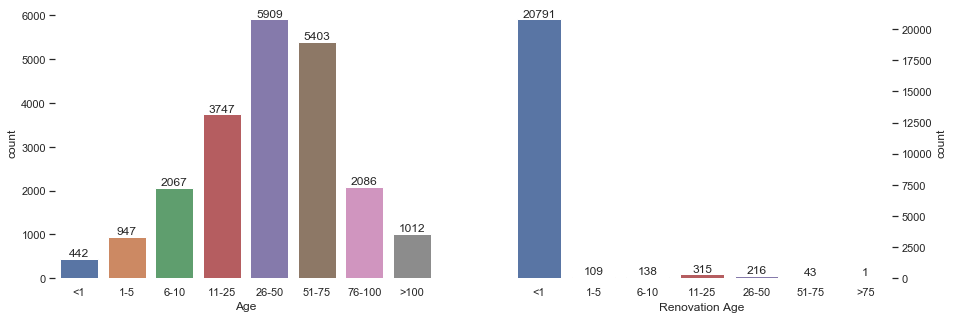

In [36]:
# histograms for the binned columns
f, axes = plt.subplots(1, 2,figsize=(15,5))
p1=sns.countplot(df_dm['age_binned'],ax=axes[0])
for p in p1.patches:
    height = p.get_height()
    p1.text(p.get_x()+p.get_width()/2,height + 50,height,ha="center")   
p2=sns.countplot(df_dm['age_rnv_binned'],ax=axes[1])
sns.despine(left=True, bottom=True)
for p in p2.patches:
    height = p.get_height()
    p2.text(p.get_x()+p.get_width()/2,height + 200,height,ha="center")
    
axes[0].set(xlabel='Age')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Renovation Age');

In [37]:
df_dm.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,sales_yr,age,age_rnv,age_binned,age_rnv_binned
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,98178,47.5112,-122.257,1340,5650,2014,59,0.0,51-75,<1
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,98125,47.7210,-122.319,1690,7639,2014,63,23.0,51-75,11-25
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,98028,47.7379,-122.233,2720,8062,2015,82,0.0,76-100,<1
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,98136,47.5208,-122.393,1360,5000,2014,49,0.0,26-50,<1
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,98074,47.6168,-122.045,1800,7503,2015,28,0.0,26-50,<1


In [38]:
# transform the factor values to be able to use in the model
df_dm = pd.get_dummies(df_dm, columns = ['age_binned','age_rnv_binned'])

In [39]:
train_data_dm,test_data_dm = train_test_split(df_dm,train_size = 0.8,random_state=3)
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

In [40]:
complex_model_1 = LinearRegression()
complex_model_1.fit(train_data_dm[features],train_data_dm['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred = complex_model_1.predict(test_data_dm[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred)),'.3f'))
rtrcm = float(format(complex_model_1.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_1.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(test_data_dm[features],test_data['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_1,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

Intercept: -57221293.13485957
Coefficients: [-5.68950279e+04  1.13310062e+04  3.18389287e+02 -2.90807628e-01
 -5.79609821e+03  5.84022824e+02]


In [42]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','selected features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending = False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,Multiple Regression-1,selected features,248514.011,0.514,0.514,0.519,-0.477,0.512
0,Simple Linear Regression,-,261457.878,0.487,-,0.516,-,0.491


We have added more features to the features list. and also printed the coefficients of the model as in the previous subsection. When we look at the evaluation metrics, they have improved significantly.

In [43]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
             'grade','age_binned_<1', 'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 
             'age_binned_26-50', 'age_binned_51-75','age_binned_76-100', 'age_binned_>100',
             'zipcode']
complex_model_2 = linear_model.LinearRegression()
complex_model_2.fit(train_data_dm[features],train_data_dm['price'])

print('Intercept: {}'.format(complex_model_2.intercept_))
print('Coefficients: {}'.format(complex_model_2.coef_))

pred = complex_model_2.predict(test_data_dm[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred)),'.3f'))
rtrcm = float(format(complex_model_2.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_2.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_2.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm = float(format(adjustedR2(complex_model_2.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_2,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))
r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-2','selected features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: 14932064.4567091
Coefficients: [-3.74523328e+04  4.83495326e+04  1.71684976e+02 -2.31081061e-01
  1.03590806e+04  5.56285921e+05  4.78399848e+04  1.24143045e+05
 -8.88123227e+04 -1.05756567e+05 -1.04723750e+05 -1.35898725e+05
 -5.37336956e+04  8.41048129e+04  1.84153081e+05  2.20667166e+05
 -1.60046391e+02]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
2,Multiple Regression-2,selected features,209712.753,0.652,0.652,0.657,0.656,0.648
1,Multiple Regression-1,selected features,248514.011,0.514,0.514,0.519,-0.477,0.512
0,Simple Linear Regression,-,261457.878,0.487,-,0.516,-,0.491


In [44]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
             'age_binned_<1', 'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 
             'age_binned_26-50', 'age_binned_51-75','age_binned_76-100', 'age_binned_>100',
             'zipcode']
complex_model_3 = linear_model.LinearRegression()
complex_model_3.fit(train_data_dm[features],train_data_dm['price'])

print('Intercept: {}'.format(complex_model_3.intercept_))
print('Coefficients: {}'.format(complex_model_3.coef_))

pred = complex_model_3.predict(test_data_dm[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred)),'.3f'))
rtrcm = float(format(complex_model_3.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_3.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_3.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm = float(format(adjustedR2(complex_model_3.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_3,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))
r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-3','selected features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: 13277703.147875806
Coefficients: [-5.45914466e+04  5.76856820e+04  2.78062297e+02 -2.90532598e-01
  4.64545866e+04  5.17529965e+05  6.30533470e+04 -5.34224920e+04
 -8.64599402e+04 -8.41838145e+04 -1.13678191e+05 -4.44007265e+04
  5.59253744e+04  1.44270295e+05  1.81949495e+05 -1.35906201e+02]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
2,Multiple Regression-2,selected features,209712.753,0.652,0.652,0.657,0.656,0.648
3,Multiple Regression-3,selected features,226737.158,0.599,0.598,0.599,0.598,0.592
1,Multiple Regression-1,selected features,248514.011,0.514,0.514,0.519,-0.477,0.512
0,Simple Linear Regression,-,261457.878,0.487,-,0.516,-,0.491
